# DNN Model

In [128]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [129]:
# data loading from .npz generated from tcr_data_process.ipynb
# loading train data
npz = np.load('data_train.npz')
train_inputs = npz['input'].astype(np.float64)
train_targets = npz['targets'].astype(np.float64)
# loading validation data
npz = np.load('data_validation.npz')
validation_inputs, validation_targets = npz['input'].astype(np.float64), npz['targets'].astype(np.float64)

npz = np.load('data_test.npz')
test_inputs, test_targets = npz['input'].astype(np.float64), npz['targets'].astype(np.float64)

# ANN Model

Outline, Optimizer, Loss function, Early stopping and Training rate

In [130]:
# NN model prep
input_size = 3
output_size = 1
hidden_layer_1_size = 15
hidden_layer_2_size = 15
hidden_layer_3_size = 10

model = tf.keras.Sequential([
    tf.keras.layers.Dense(input_size),
    tf.keras.layers.Dense(hidden_layer_1_size, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(hidden_layer_2_size, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(hidden_layer_3_size, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(output_size, activation='linear')
])


In [131]:
# model prep, optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer, loss=tf.keras.losses.MeanSquaredError(),metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [132]:
# Training
BATCH_SIZE = 1
MAX_EPOCHS = 500
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)

In [133]:
# fit the model
history = model.fit(
    train_inputs, train_targets, batch_size=BATCH_SIZE,epochs=MAX_EPOCHS, callbacks=[early_stopping], validation_data=(validation_inputs, validation_targets), verbose=2
          )

Epoch 1/500
640/640 - 1s - loss: 4.8654 - root_mean_squared_error: 2.2058 - val_loss: 4.2281 - val_root_mean_squared_error: 2.0562 - 544ms/epoch - 851us/step
Epoch 2/500
640/640 - 0s - loss: 3.7730 - root_mean_squared_error: 1.9424 - val_loss: 3.2728 - val_root_mean_squared_error: 1.8091 - 230ms/epoch - 360us/step
Epoch 3/500
640/640 - 0s - loss: 2.9029 - root_mean_squared_error: 1.7038 - val_loss: 2.5169 - val_root_mean_squared_error: 1.5865 - 229ms/epoch - 358us/step
Epoch 4/500
640/640 - 0s - loss: 2.2230 - root_mean_squared_error: 1.4910 - val_loss: 1.9329 - val_root_mean_squared_error: 1.3903 - 228ms/epoch - 356us/step
Epoch 5/500
640/640 - 0s - loss: 1.6928 - root_mean_squared_error: 1.3011 - val_loss: 1.4772 - val_root_mean_squared_error: 1.2154 - 229ms/epoch - 358us/step
Epoch 6/500
640/640 - 0s - loss: 1.2845 - root_mean_squared_error: 1.1333 - val_loss: 1.1265 - val_root_mean_squared_error: 1.0614 - 243ms/epoch - 380us/step
Epoch 7/500
640/640 - 0s - loss: 0.9751 - root_mean_

In [134]:
# ANN model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (1, 3)                    12        
                                                                 
 dense_31 (Dense)            (1, 15)                   60        
                                                                 
 dense_32 (Dense)            (1, 15)                   240       
                                                                 
 dense_33 (Dense)            (1, 10)                   160       
                                                                 
 dense_34 (Dense)            (1, 1)                    11        
                                                                 
Total params: 483 (1.89 KB)
Trainable params: 483 (1.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [135]:
# saving training history as a dataframe
df_history = pd.DataFrame(history.history)
df_history.to_csv('data/training_histroy.csv')
display(df_history)

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,4.865413,2.205768,4.228098,2.056234
1,3.772968,1.942413,3.272797,1.809087
2,2.902865,1.703780,2.516881,1.586468
3,2.222952,1.490957,1.932884,1.390282
4,1.692755,1.301059,1.477183,1.215394
...,...,...,...,...
128,0.000005,0.002200,0.000005,0.002162
129,0.000005,0.002226,0.000004,0.002016
130,0.000005,0.002245,0.000005,0.002192
131,0.000005,0.002292,0.000004,0.001952


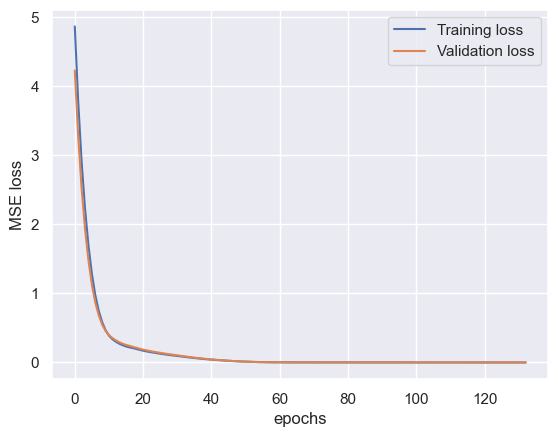

<Figure size 640x480 with 0 Axes>

In [136]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('MSE loss')
plt.legend()
plt.show()
plt.savefig('loss_ann1.png')

# Model check on Test data

In [137]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

3/3 [==============================] - 0s 1ms/step - loss: 4.4193e-06 - root_mean_squared_error: 0.0021


In [138]:
print('\nTest loss: {0:.4f}. Test accuracy: {1:.4f} rmse'.format(test_loss, test_accuracy))


Test loss: 0.0000. Test accuracy: 0.0021 rmse


In [139]:
prediction = model.predict(test_inputs)
data_inputs = pd.DataFrame(test_inputs)
prediction = pd.DataFrame(np.round(prediction,3))
test_targets = pd.DataFrame(test_targets)
pred_accu = np.round((prediction/test_targets)*100,2)

result = pd.concat([test_targets, prediction, pred_accu], axis = 1, ignore_index=True)
result.columns = ['Target-St(%)', 'Prediction-St(%)','Pred-Accu-St(%)']
result.to_csv('data/error_prediction.csv')
result

3/3 [==============================] - 0s 1ms/step


,Target-St(%),Prediction-St(%),Pred-Accu-St(%)
0,0.968,0.967,99.90
1,0.975,0.976,100.10
2,0.968,0.967,99.90
3,0.977,0.975,99.80
4,0.985,0.984,99.90
...,...,...,...
75,0.930,0.933,100.32
76,0.961,0.963,100.21
77,0.977,0.975,99.80
78,0.971,0.967,99.59


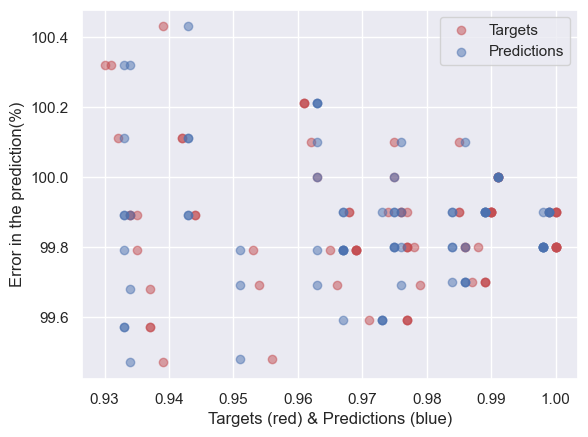

In [140]:
import matplotlib.pyplot as plt
plt.scatter(result['Target-St(%)'], result['Pred-Accu-St(%)'], alpha=0.5, color='r', label='Targets')
plt.scatter(result['Prediction-St(%)'], result['Pred-Accu-St(%)'],alpha=0.5, color='b', label='Predictions')
plt.ylabel('Error in the prediction(%)')
plt.xlabel('Targets (red) & Predictions (blue)')
plt.legend()
plt.savefig('pred1.png')


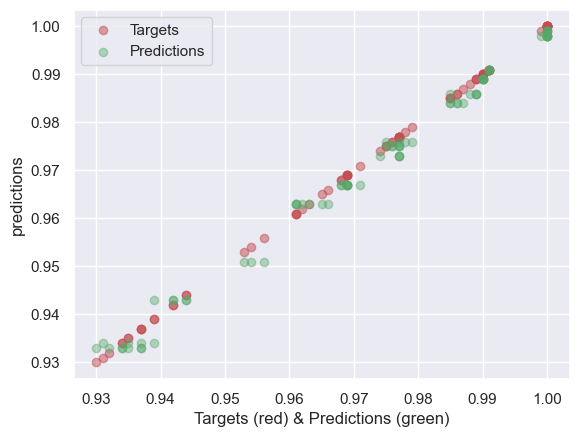

In [141]:
plt.scatter(result['Target-St(%)'], result['Target-St(%)'], alpha=0.5, color='r', label='Targets')
plt.scatter(result['Target-St(%)'], result['Prediction-St(%)'], alpha=0.4, color='g', label='Predictions')

plt.ylabel('predictions')
plt.xlabel('Targets (red) & Predictions (green)')
plt.legend()
plt.savefig('pred2.png')

In [142]:
# estimation of R2 score
from sklearn.metrics import r2_score
r2_score_test = r2_score(test_targets, prediction)
np.round(r2_score_test,4)

0.9896

In [143]:
# estimation of adjusted R2 score
n = np.size(test_targets)
k = 3 # number of features
adj_r2_score = 1 - (((1-r2_score_test)*(n-1))/((n-k-1)))
np.round(adj_r2_score,4)

0.9892

In [144]:
mean_pred = pred_accu.mean()
std_pred = pred_accu.std()
uncertainty_model = std_pred
print("Uncertainty of the ANN model:", np.round(uncertainty_model[0],2), '[%]')
print("Average test prediction precision", np.round(100 - uncertainty_model[0],2), '[%]')

Uncertainty of the ANN model: 0.18 [%]
Average test prediction precision 99.82 [%]


# ANN Model Deployment

ANN model deployment for micro DSC error prediction

In [145]:
import keras
model.save('micro_dsc_dl.h5')

/Users/nirmal/Documents/np_dsci_codes/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [146]:
import keras
model.save('micro_dsc_dl.hdf5')